# Prep work

In [1]:
import pandas as pd
import inspect #to inspect dataset with custom function
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #correlation matrix and logarithmic


import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.__version__

'2.3.1'

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('/home/bri/carprice/dataset/CarPrice_Assignment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Dictionary

car_ID: Unique ID # for each car

Symboling: Acturian assessment of risk of the car (numerical values where -3 is safe, +3 is risky)

CarName: Make and model of car

Fueltype: Car Fuel Type (gas or diesel)

Aspiration: Car Aspiration (standard or turbo)

Doornumber: Number of car doors (two or four)

Carbody: Type of car body (convertible, sedan, hatchback, wagon, or hardtop)

Drivewheel: Car drive wheel (rear wheel drive, 4 wheel drive or front wheel drive)

Enginelocation: Location of car engine (front of rear)

Wheelbase: Car wheel base in inches

Carlength: Car length in inches

Carwidth: Car width in inches

Carheight: Car height in inches

Curbweight: Car weight in pounds

Enginetype: Car engine type (dohc, dohcv, I, ohc, ohcf, ohcv, or rotor)

Cylindernumber: Number of car cylinders (two, three, four, five, six, eight, or twelve)

Enginesize: Size of engine (numerical values of cubic inches)

Fuelsystem: Type of car fuel system (1bbl, 2 bbl, 4 bbl, idi, mfi, mpfi, spdi, or spfi)

Boreratio: Car Bore-Stroke Ratio is the ratio between the dimensions of the engine cylinder bore diameter to its piston stroke-length

Stroke: Car strokes (numerical value in strokes)

Compressionratio: Car compression ratio (ratio between the volume of the cylinder with the piston in the bottom position, Vbottom (largest volume), and in the top position, Vtop (smallest volume))

Horsepower: Car horsepower (numerical values of horsepower)

Peakrpm: Car peak RPM (revolutions per minute)

Citympg: Car city MPG (miles per gallon)

Highwaympg: Car highway MPG (miles per gallon)

Price: total price of car in dollars

In [5]:
df.sample(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
143,144,0,subaru baja,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2340,ohcf,four,108,mpfi,3.62,2.64,9.0,94,5200,26,32,9960.0
155,156,0,toyota carina,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,59.1,3110,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800,27,32,8778.0


# Custom function to check data

In [6]:
def data_check(*datasets):
    """
    Function to display missing values, percentage of missing values,
    duplicated data, total rows, unique values, and dtype of each column for multiple datasets.

    :param datasets: One or more pandas dataframes to check.
    :return: A summary dataframe with the details for all datasets.
    """

    # Get the variable names from the caller's scope
    caller_locals = inspect.currentframe().f_back.f_locals
    dataset_names = [name for name, val in caller_locals.items() if id(val) in [id(ds) for ds in datasets]]

    summary_list = []  # To store details for each dataset

    for i, data in enumerate(datasets):
        # Get the name of the dataset variable
        dataset_name = dataset_names[i] if i < len(dataset_names) else f'Dataset_{i+1}'

        # For each dataset, compute the necessary details
        null_counts = data.isnull().sum()
        null_percentage = (null_counts / len(data)) * 100
        dup_count = data.duplicated().sum()
        dtypes = data.dtypes
        total_rows = len(data)
        unique_values = data.nunique()  # Calculate unique values per column

        # Create a temporary DataFrame to store the results for this dataset
        temp_df = pd.DataFrame({
            'Dataset': dataset_name,
            'Column': data.columns,
            'Data Type': dtypes.values,
            'Missing Values': null_counts.values,
            'Percentage Missing': null_percentage.values,
            'Total Rows': [total_rows] * len(data.columns),
            'Duplicate Rows': [dup_count] * len(data.columns),
            'Unique Values': unique_values.values  # Add unique values per column
        })

        # Append the result to the summary list
        summary_list.append(temp_df)

    # Concatenate all summaries into one DataFrame
    final_summary = pd.concat(summary_list, ignore_index=True)

    return final_summary

## Check for Misval, Dups, Unique

In [7]:
data_check(df)

,Dataset,Column,Data Type,Missing Values,Percentage Missing,Total Rows,Duplicate Rows,Unique Values
0,df,car_ID,int64,0,0.0,205,0,205
1,df,symboling,int64,0,0.0,205,0,6
2,df,CarName,object,0,0.0,205,0,147
3,df,fueltype,object,0,0.0,205,0,2
4,df,aspiration,object,0,0.0,205,0,2
5,df,doornumber,object,0,0.0,205,0,2
6,df,carbody,object,0,0.0,205,0,5
7,df,drivewheel,object,0,0.0,205,0,3
8,df,enginelocation,object,0,0.0,205,0,2
9,df,wheelbase,float64,0,0.0,205,0,53


# Custom function to check categorical columns

In [8]:
def categorical_summary(df):
    """
    Automatically detects categorical/'object' columns in a DataFrame
    and prints unique values for each categorical column.

    :param df: Input pandas DataFrame
    """
    # Detect categorical columns (object dtype and category dtype)
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    if not categorical_columns:
        print("No categorical columns found in the DataFrame.")
        return

    print(f"Found {len(categorical_columns)} categorical columns:\n")
    for col in categorical_columns:
        unique_vals = df[col].unique()
        print(f"'{col}' has {len(unique_vals)} unique categories: {unique_vals}\n")

In [9]:
categorical_summary(df)

Found 10 categorical columns:

'CarName' has 147 unique categories: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick cen

## dropping car_ID and carName because these two are not relevant for Regression Analysis

In [10]:
df =df.drop(['car_ID', 'CarName'], axis=1)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Distribution num feats

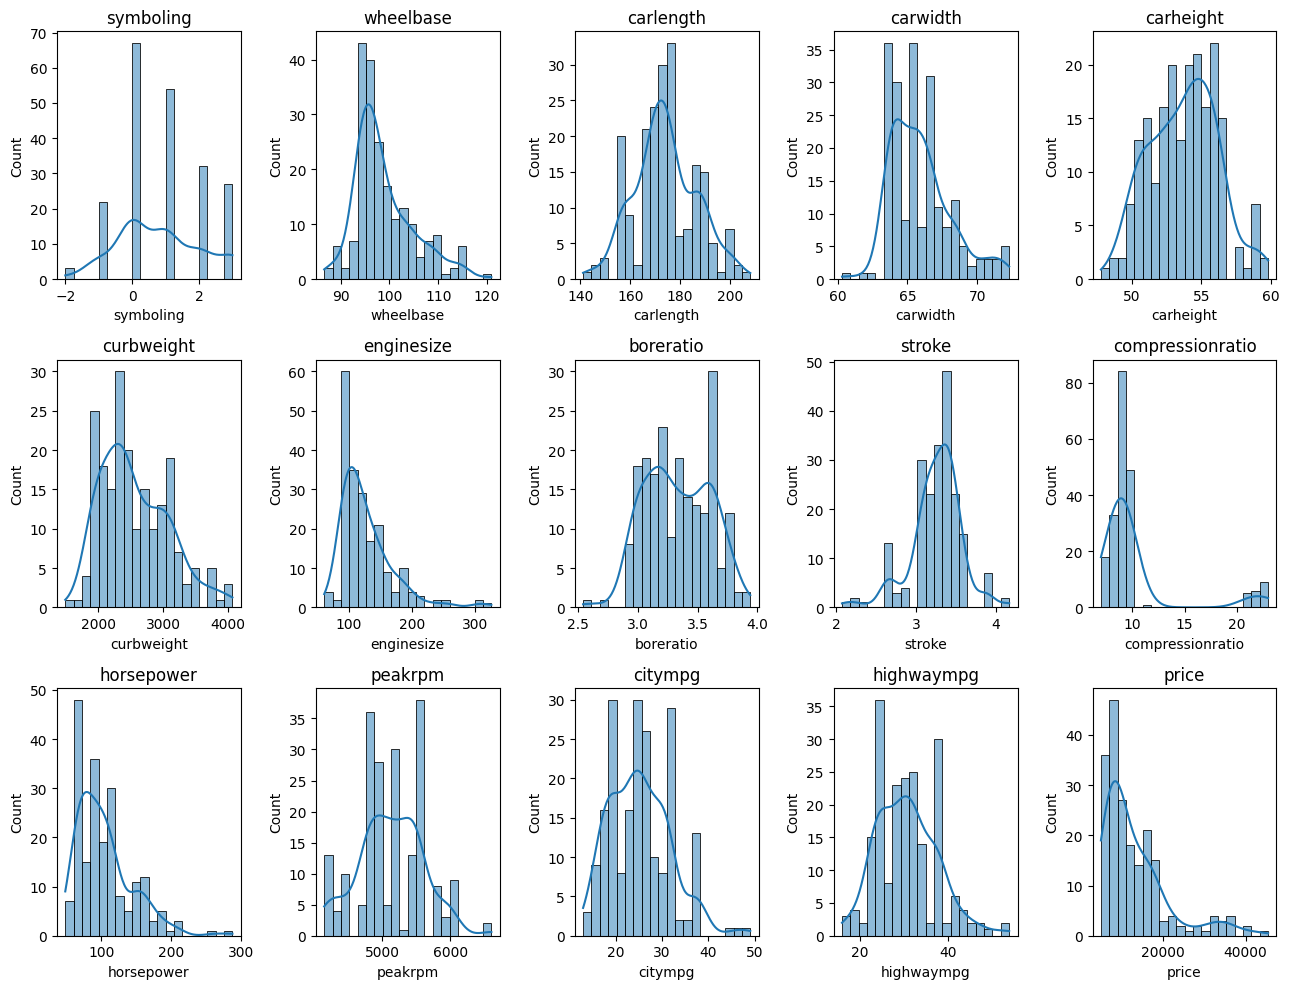

In [11]:
# Distribution of Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(13, 10))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

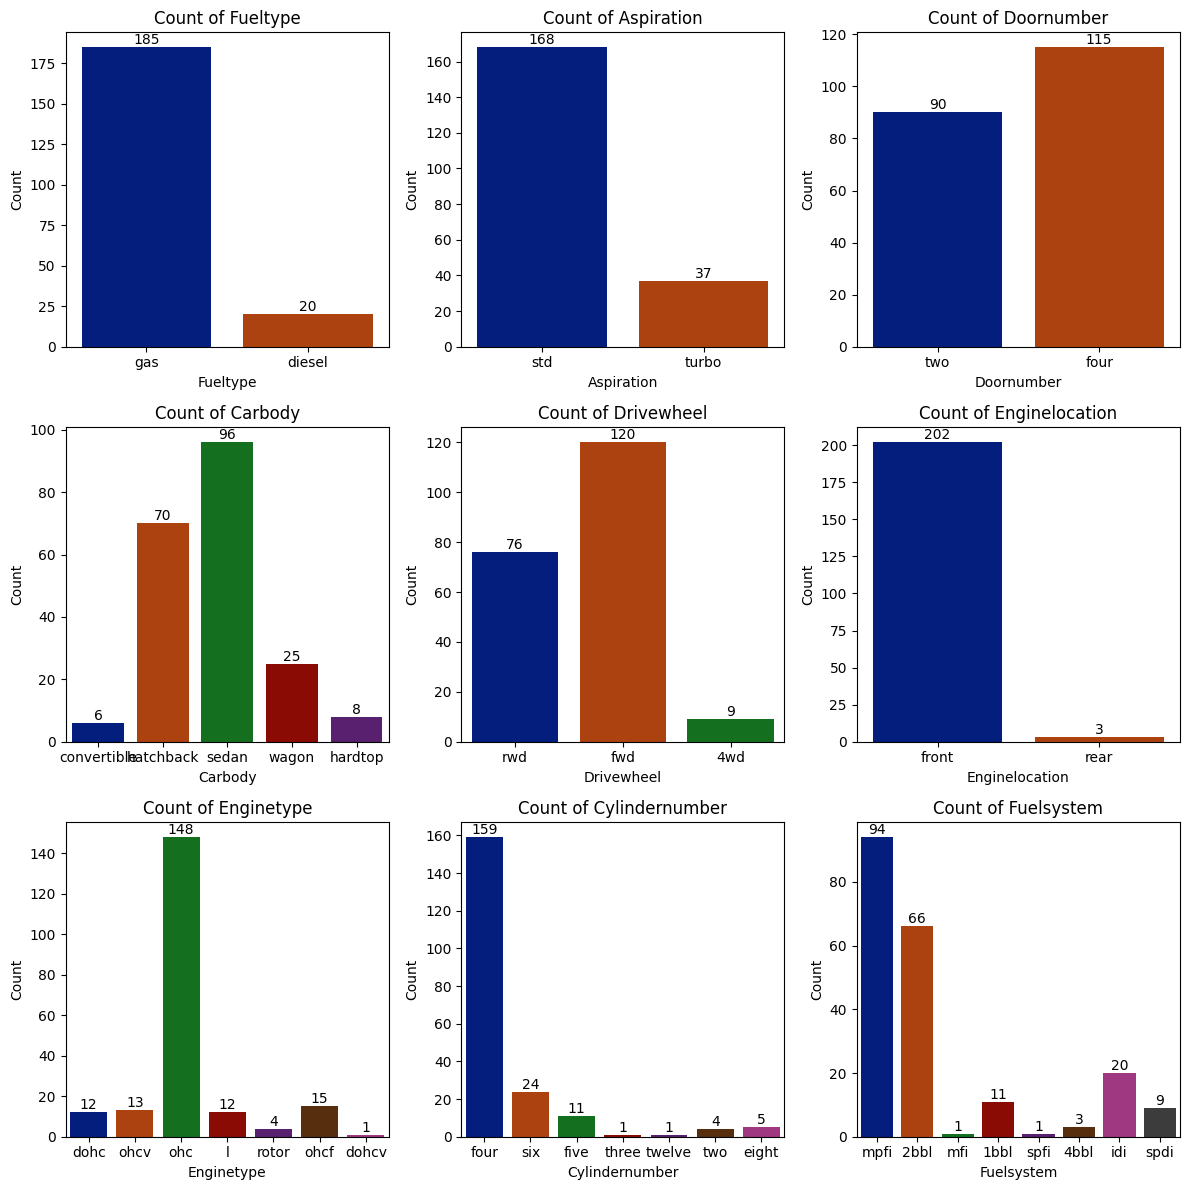

In [12]:
# Define the list of categorical columns to analyze
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='dark', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

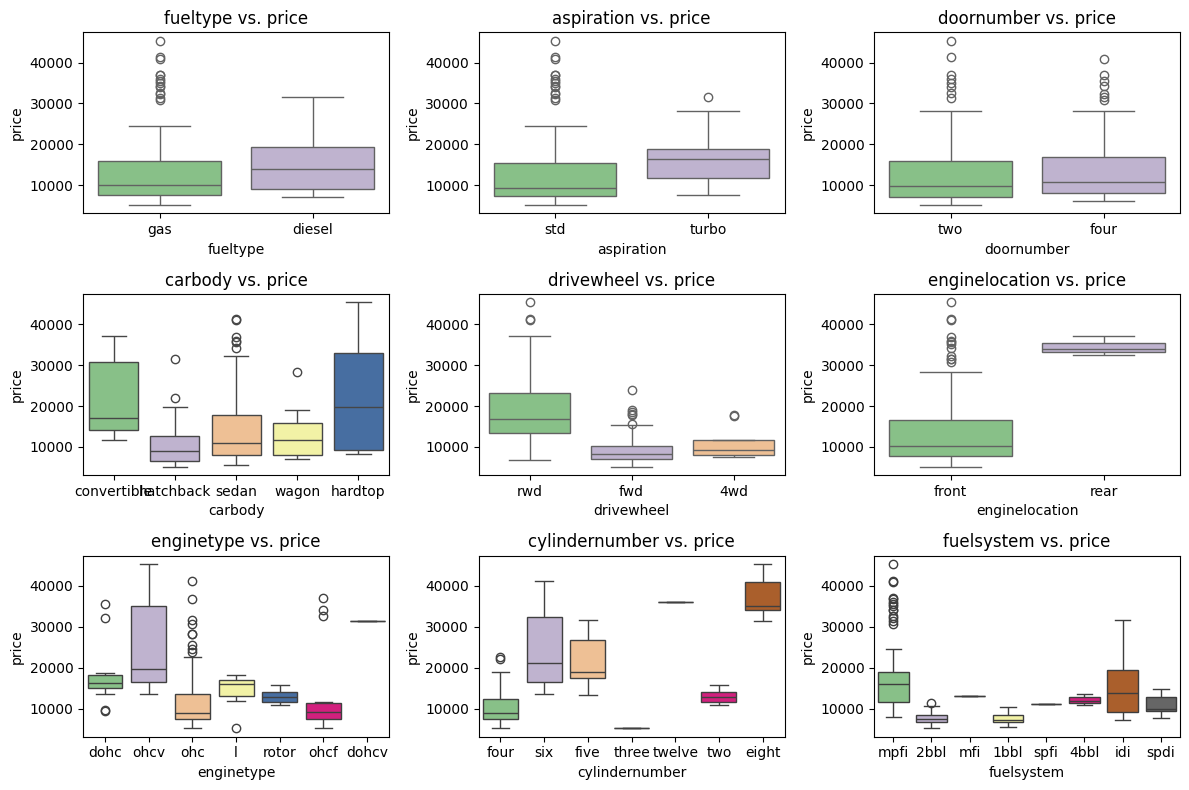

In [13]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_columns):
    plt.subplot(3, 3, i + 1)

    # Get unique categories and generate a color palette
    n_categories = df[feature].nunique()
    palette = sns.color_palette("Accent", n_categories)

    # Create boxplot with dynamic colors
    sns.boxplot(data=df, x=feature, y='price', palette=palette)
    plt.title(f'{feature} vs. price')

plt.tight_layout()
plt.show()

# Correlation Matrix Numerical

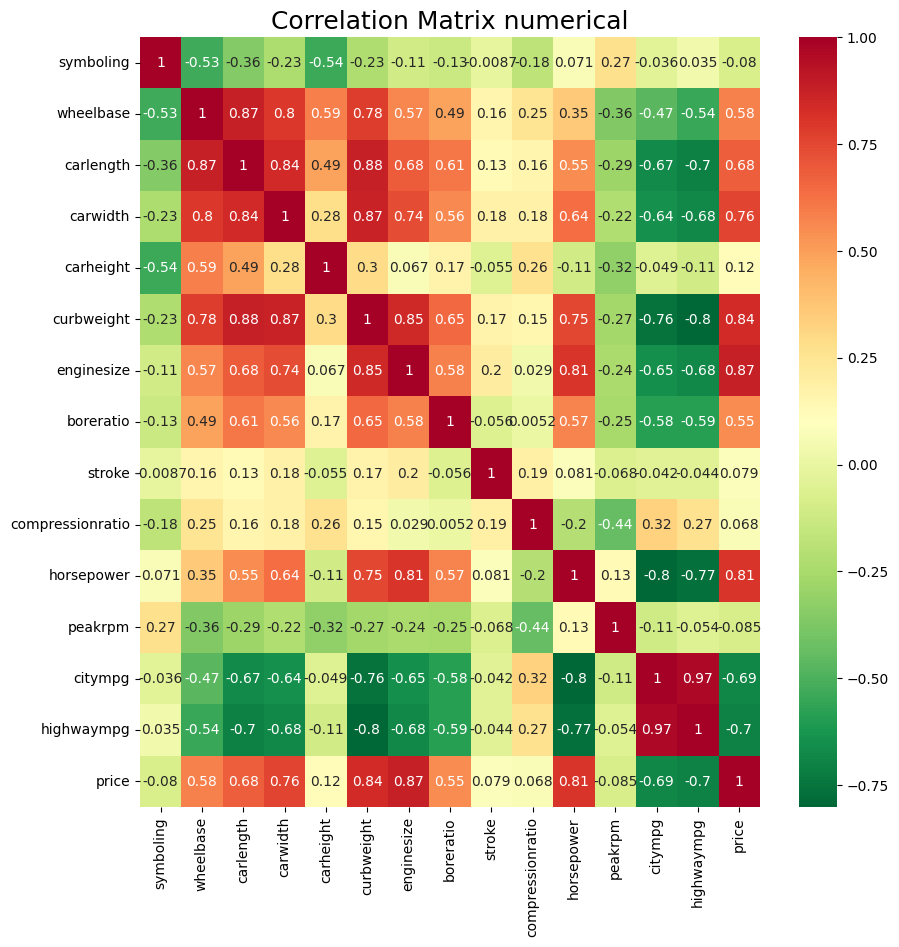

In [14]:
df_corr = df[numerical_features]
corr = df_corr.corr(method='pearson')

plt.subplots(figsize=(10, 10))

sns.heatmap(corr, cmap='RdYlGn_r', annot=True)


plt.title("Correlation Matrix numerical", fontsize = 18)
plt.show()

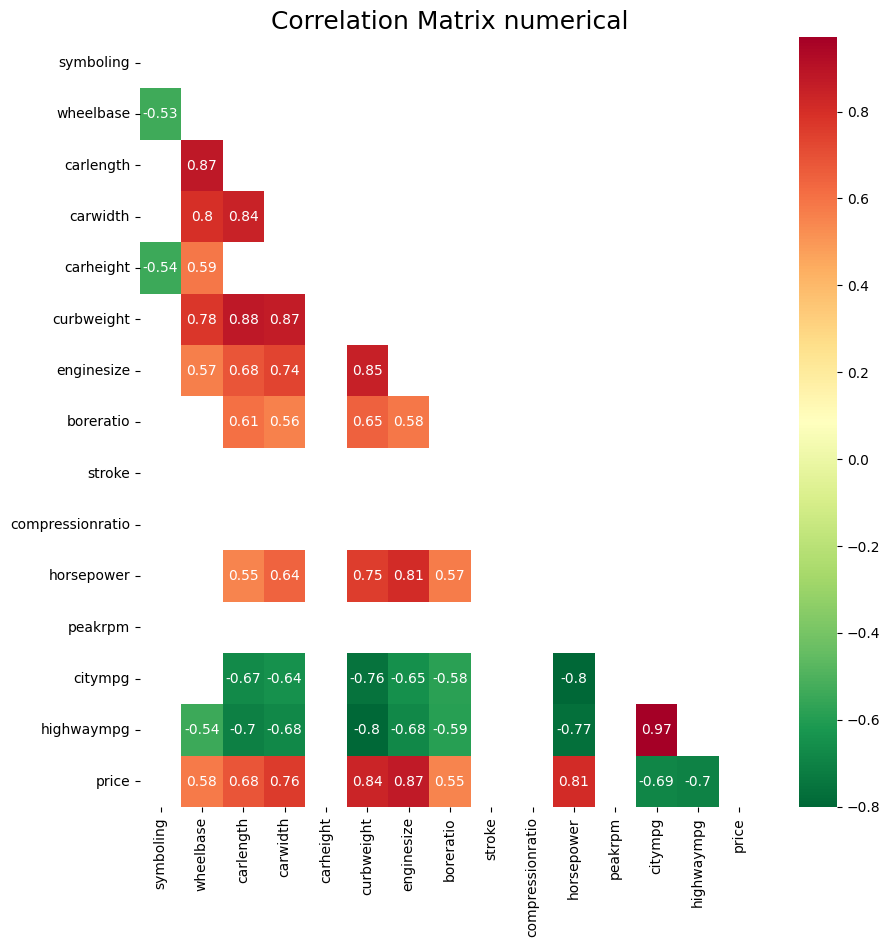

In [15]:
df_corr = df[numerical_features]
corr = df_corr.corr(method='pearson')

plt.subplots(figsize=(10, 10))

# create mask to display only the bottom triangle and filter out corr coef below 0.5
trimask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='RdYlGn_r', mask=trimask | (np.abs(corr) <= 0.5), annot=True)


plt.title("Correlation Matrix numerical", fontsize = 18)
plt.show()

In [16]:
numerical_features

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [17]:
num_feats = [col for col in numerical_features if col != 'price']

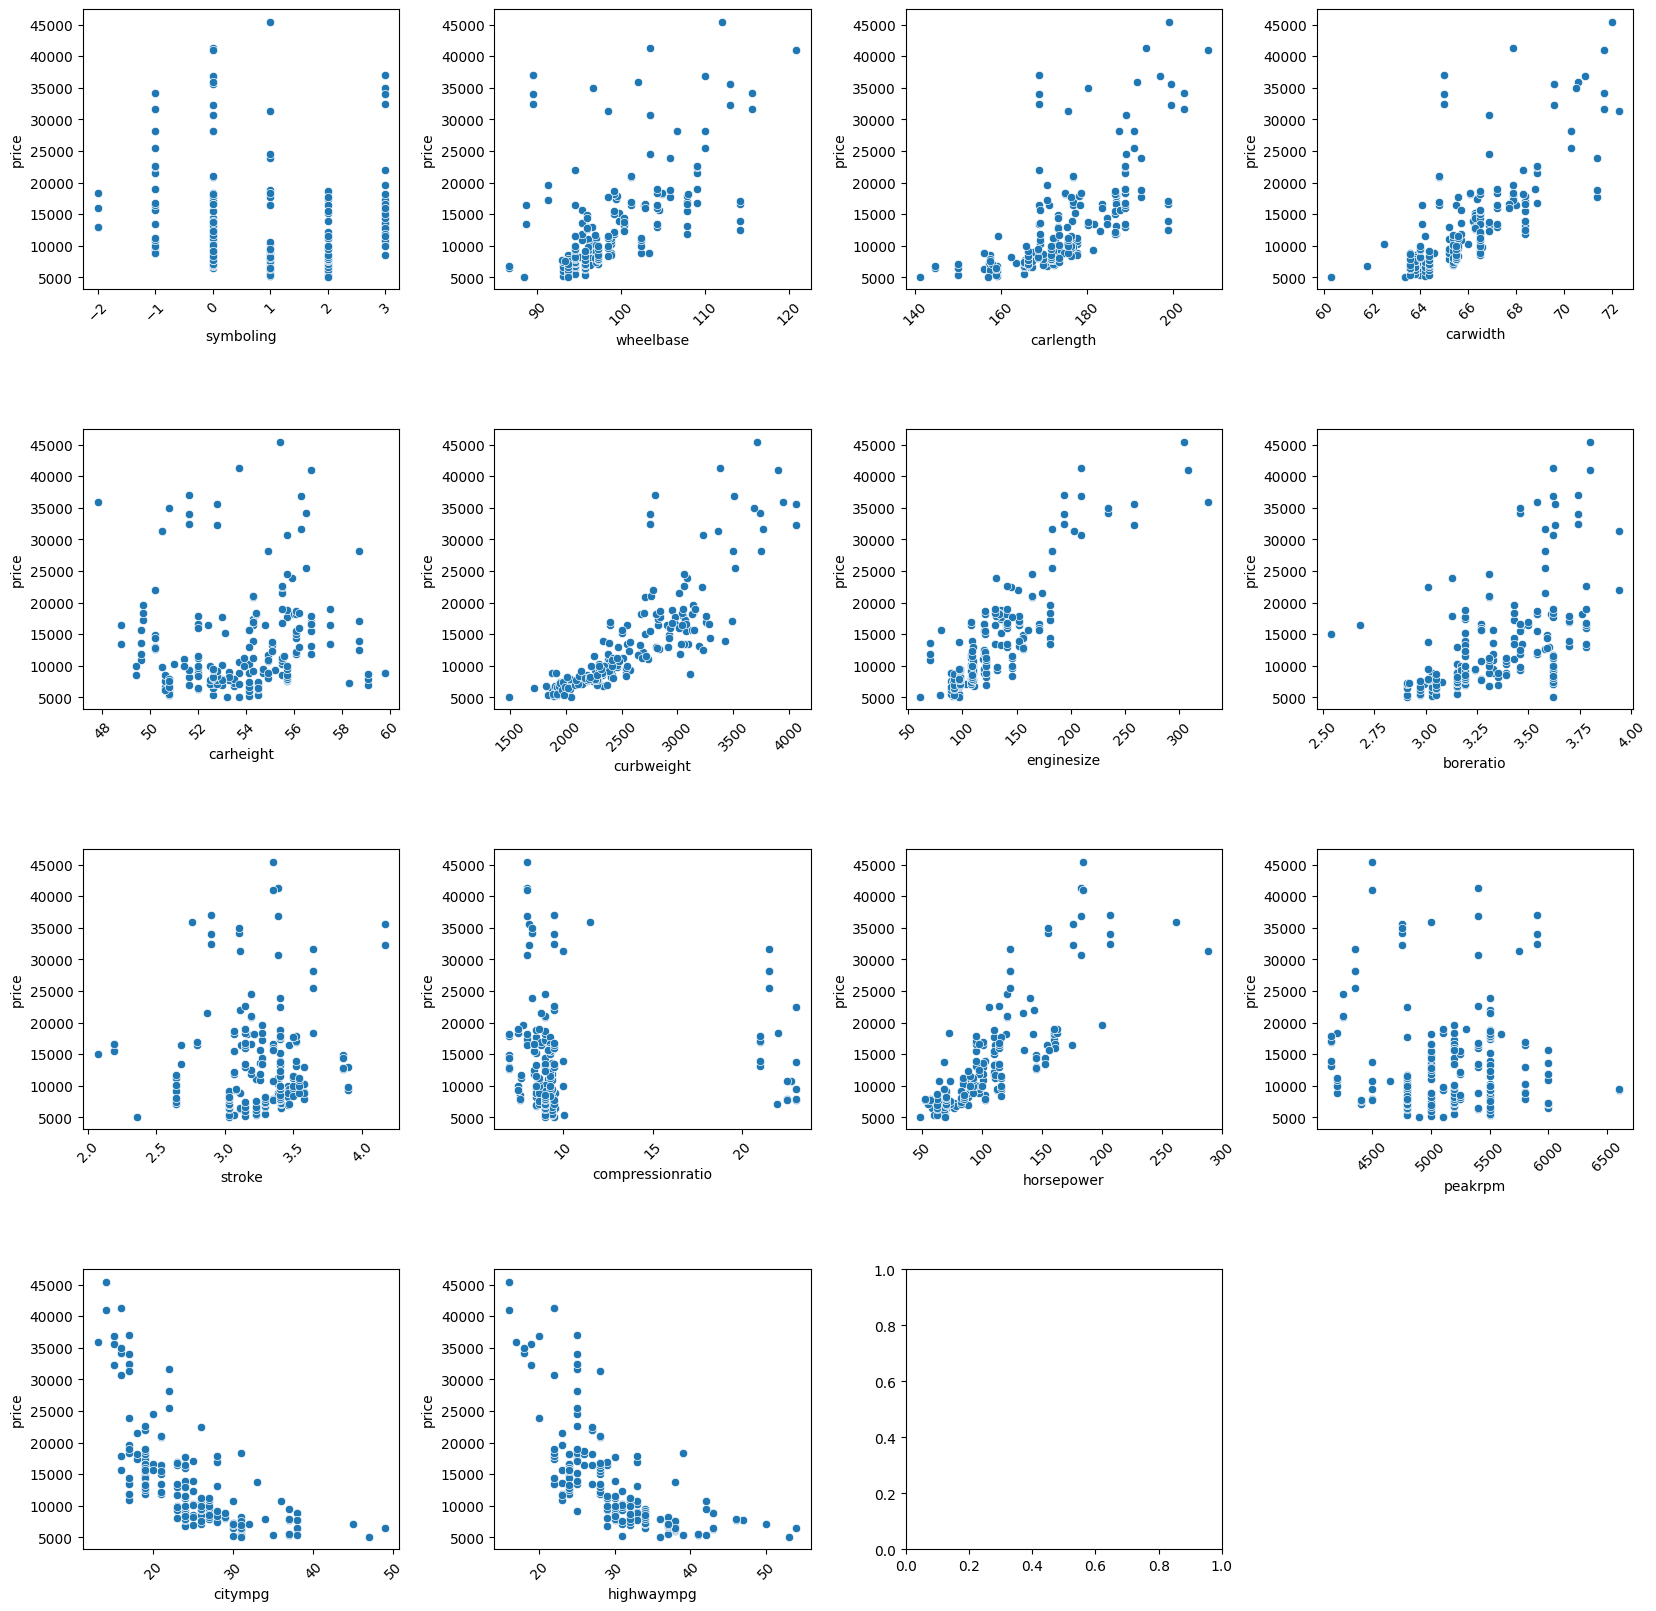

In [18]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flat = axes.flatten()  # Flatten to 1D for easy indexing

for x, col in enumerate(num_feats):
    ax = axes_flat[x]  # Use flat index
    sns.scatterplot(x=col, y='price', data=df, ax=ax)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-labels

# Hide the unused last subplot (index 15)
axes_flat[15].set_axis_off()

plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust vertical AND horizontal spacing
plt.show()

#### symboling column must be treated as str or object as it is in fact not a num feat

In [19]:
df['symboling'] = df['symboling'].astype(object)

#### rerun numercl_features and num_feats for the correct order

In [20]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_feats = [col for col in numerical_features if col != 'price']

# Model Building

## Baseline Model Regression

Using only numerical features without any transformation

### using sklearn

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df[num_feats]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

num_feats = 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',

In [22]:
# Inisialisasi Model
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regresion':Ridge(alpha=1.0),
    'Lasso Regression':Lasso(alpha=0.1),
    'ElasticNet Regression':ElasticNet(alpha=0.1, l1_ratio=0.5)
}

In [23]:
results = pd.DataFrame()
# Loop training dan evaluasi model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Simpan hasil evaluasi di dictionary
    results[name] = {'RMSE': rmse, 'R^2': r2, 'MAE': mae}


In [24]:
# Tampilan Hasil Evaluasi
for model_name, metrics in results.items():
  print(f"{model_name}:")
  print(f" RMSE: {metrics['RMSE']:.2f}")
  print(f" MAE: {metrics['MAE']:.2f}")
  print(f" R^2: {metrics['R^2']:.3f}")
  print("")

Linear Regression:
 RMSE: 3559.69
 MAE: 2754.85
 R^2: 0.840

Ridge Regresion:
 RMSE: 3566.52
 MAE: 2753.72
 R^2: 0.839

Lasso Regression:
 RMSE: 3559.81
 MAE: 2754.90
 R^2: 0.840

ElasticNet Regression:
 RMSE: 3602.66
 MAE: 2746.20
 R^2: 0.836



#### Result

In [25]:
results_df = pd.DataFrame(results).T
results_df

,RMSE,R^2,MAE
Linear Regression,3559.686963,0.840101,2754.850868
Ridge Regresion,3566.521792,0.839487,2753.721510
Lasso Regression,3559.812901,0.840090,2754.896378
ElasticNet Regression,3602.659486,0.836218,2746.204457


### residual plot - linearity assumption

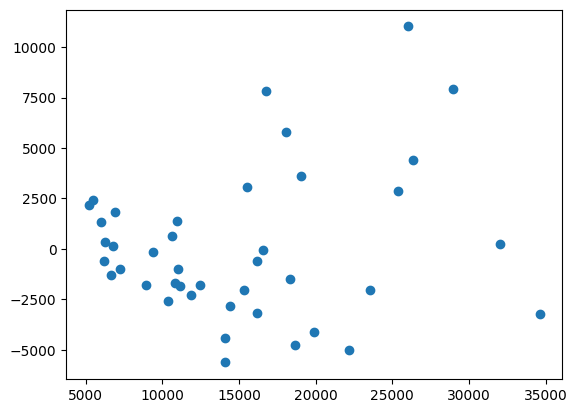

In [26]:
res = y_test- y_pred

plt.scatter(y_pred, res)
plt.show()

### using statsmodels

In [27]:
import statsmodels.api as sm 

In [28]:
X_train1 = sm.add_constant(X_train)
X_train1

,const,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
152,1.0,95.7,158.7,63.6,54.5,2015,92,3.05,3.030,9.0,62,4800,31,38
162,1.0,95.7,166.3,64.4,52.8,2140,98,3.19,3.030,9.0,70,4800,28,34
179,1.0,102.9,183.5,67.7,52.0,3016,171,3.27,3.350,9.3,161,5200,19,24
103,1.0,100.4,184.6,66.5,55.1,3060,181,3.43,3.270,9.0,152,5200,19,25
50,1.0,93.1,159.1,64.2,54.1,1890,91,3.03,3.150,9.0,68,5000,30,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.0,95.3,169.0,65.7,49.6,2385,70,3.33,3.255,9.4,101,6000,17,23
146,1.0,97.0,173.5,65.4,53.0,2290,108,3.62,2.640,9.0,82,4800,28,32
66,1.0,104.9,175.0,66.1,54.4,2700,134,3.43,3.640,22.0,72,4200,31,39
135,1.0,99.1,186.6,66.5,56.1,2758,121,3.54,3.070,9.3,110,5250,21,28


In [29]:
lr_1 = sm.OLS(y_train, X_train1).fit()


In [30]:
lr_1.params

const              -43252.025095
wheelbase             204.897721
carlength            -111.574816
carwidth              486.022891
carheight             -34.741893
curbweight              1.810523
enginesize            111.475474
boreratio            -188.742660
stroke              -2821.416054
compressionratio      320.186325
horsepower             29.672705
peakrpm                 2.315352
citympg              -267.899384
highwaympg            166.860848
dtype: float64

In [31]:
print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     64.06
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           2.17e-54
Time:                        14:03:49   Log-Likelihood:                -1545.2
No. Observations:                 164   AIC:                             3118.
Df Residuals:                     150   BIC:                             3162.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.325e+04   1.78e+04  

In [32]:
X_test1 = sm.add_constant(X_test)
y_pred1 = lr_1.predict(X_test1)
r2_score(y_test, y_pred1)

0.8401014356167757

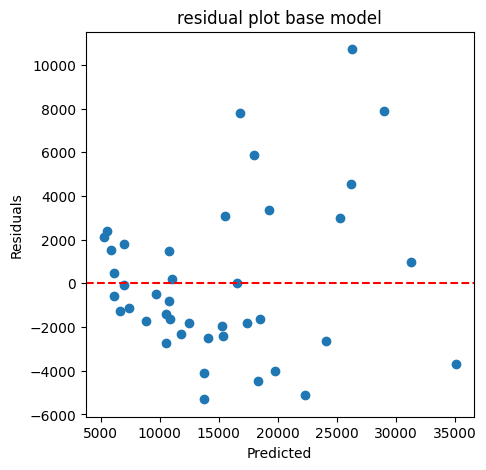

In [33]:
res1 = y_test - y_pred1

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.scatter(y_pred1, res1)
plt.axhline(y=0, color='r', linestyle='--')
ax.set_title("residual plot base model")
plt.show()

# Transformation 1 standardizing

## copy dataset

In [34]:
df_t = df.copy()
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

### change appropriate data type

In [35]:
df_t['symboling'] = df_t['symboling'].astype(object)
df_t['curbweight'] = df_t['curbweight'].astype(float)
df_t['enginesize'] = df_t['enginesize'].astype(float)
df_t['horsepower'] = df_t['horsepower'].astype(float)
df_t['peakrpm'] = df_t['peakrpm'].astype(float)
df_t['citympg'] = df_t['citympg'].astype(float)
df_t['highwaympg'] = df_t['highwaympg'].astype(float)
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    float64
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    float64
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

## num_fts numerical

In [36]:
num = df_t.select_dtypes(include=['float64']).columns.tolist()
num_fts = [col for col in num if col != 'price']
num_fts

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

## Splitting dataset

In [37]:
Xt = df_t[num_fts]
yt = df_t['price']

Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.2, random_state=33)

## Standard Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Xt_train[num_fts] = scaler.fit_transform(Xt_train[num_fts])
Xt_train.sample(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
33,-0.809315,-1.901847,-0.856477,-0.421885,-1.140772,-0.794159,-1.523496,0.501797,-0.232780,-0.694666,1.900195,0.680595,0.418338
117,1.613465,1.086727,1.211265,0.989291,1.194572,0.216402,1.102196,-0.145938,-0.785619,1.090488,1.046993,-1.131868,-1.016964
53,-0.910970,-0.533780,-0.760303,0.200693,-1.130959,-0.818220,-1.073377,-0.340258,-0.283038,-0.911049,-0.232810,0.831633,0.992459


In [39]:
yt_train.head(3)

152     6488.0
162     9258.0
179    15998.0
Name: price, dtype: float64

In [40]:
Xt_test[num_fts] = scaler.fit_transform(Xt_test[num_fts])
Xt_test.sample(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
204,1.467518,0.996092,1.081839,0.536429,0.689636,0.159879,1.426559,-0.325127,-0.181717,0.003124,0.423867,-0.852392,-0.701888
167,-0.234756,-0.052148,-0.354597,-0.863163,-0.285045,0.283094,0.849958,0.740071,-0.233099,0.045818,-0.781581,-0.020295,0.093068
120,-0.982484,-1.624508,-1.138107,-1.423000,-1.354953,-1.096916,-1.492481,-0.081653,-0.207408,-0.978835,0.624775,1.144640,1.364997


## model building and eval

### sklearn

In [41]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regresion':Ridge(alpha=1.0),
    'Lasso Regression':Lasso(alpha=0.1),
    'ElasticNet Regression':ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = pd.DataFrame()
# Loop training dan evaluasi model
for name, model in models.items():
    model.fit(Xt_train, yt_train)
    yt_pred = model.predict(Xt_test)

    mse = mean_squared_error(yt_test, yt_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(yt_test, yt_pred)
    r2 = r2_score(yt_test, yt_pred)

    # Simpan hasil evaluasi di dictionary
    results[name] = {'RMSE': rmse, 'R^2': r2, 'MAE': mae}
    

# Tampilan Hasil Evaluasi
for model_name, metrics in results.items():
  print(f"{model_name}:")
  print(f" RMSE: {metrics['RMSE']:.2f}")
  print(f" MAE: {metrics['MAE']:.2f}")
  print(f" R^2: {metrics['R^2']:.3f}")
  print("")

Linear Regression:
 RMSE: 4274.65
 MAE: 2936.48
 R^2: 0.769

Ridge Regresion:
 RMSE: 4291.93
 MAE: 2930.34
 R^2: 0.768

Lasso Regression:
 RMSE: 4274.70
 MAE: 2936.19
 R^2: 0.769

ElasticNet Regression:
 RMSE: 4376.18
 MAE: 2975.17
 R^2: 0.758



### statsmodels

In [42]:
Xt_train1 = sm.add_constant(Xt_train)
lr_t1 = sm.OLS(yt_train, Xt_train1).fit()
print(lr_t1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     64.06
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           2.17e-54
Time:                        14:03:50   Log-Likelihood:                -1545.2
No. Observations:                 164   AIC:                             3118.
Df Residuals:                     150   BIC:                             3162.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.283e+04    244.126  

In [43]:
Xt_test1 = sm.add_constant(Xt_test)
yt_pred1 = lr_t1.predict(Xt_test1)

In [44]:
r2_score(yt_test, yt_pred1)

0.7694197896129562

### residual plot linearity

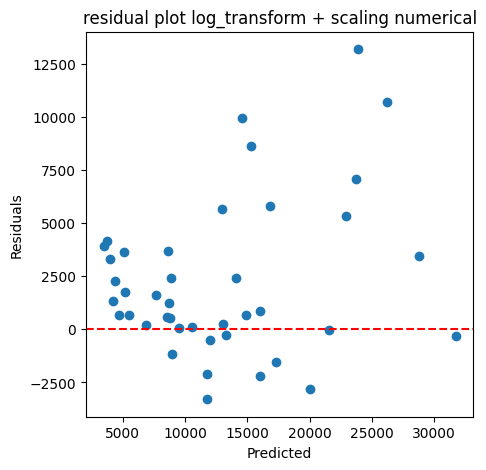

In [45]:
res1 = yt_test - yt_pred1

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.scatter(yt_pred1, res1)
plt.axhline(y=0, color='r', linestyle='--')
ax.set_title("residual plot log_transform + scaling numerical")
plt.show()

### RESULTS

# T2 RFECV

In [46]:
from sklearn.feature_selection import RFECV

In [47]:
lm = LinearRegression()
lm.fit(Xt_train, yt_train)
rfecv = RFECV(estimator=lm)       
rfecv = rfecv.fit(Xt_train, yt_train)
list(zip(Xt_train.columns,rfecv.support_,rfecv.ranking_))

[('wheelbase', np.True_, np.int64(1)),
 ('carlength', np.True_, np.int64(1)),
 ('carwidth', np.True_, np.int64(1)),
 ('carheight', np.False_, np.int64(2)),
 ('curbweight', np.True_, np.int64(1)),
 ('enginesize', np.True_, np.int64(1)),
 ('boreratio', np.False_, np.int64(3)),
 ('stroke', np.True_, np.int64(1)),
 ('compressionratio', np.True_, np.int64(1)),
 ('horsepower', np.True_, np.int64(1)),
 ('peakrpm', np.True_, np.int64(1)),
 ('citympg', np.True_, np.int64(1)),
 ('highwaympg', np.True_, np.int64(1))]

In [48]:
col_supcv = Xt_train.columns[rfecv.support_]
print(col_supcv)
print(f"Optimal number of features: {rfecv.n_features_}")

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg'],
      dtype='object')
Optimal number of features: 11


## Visualizing RFECV

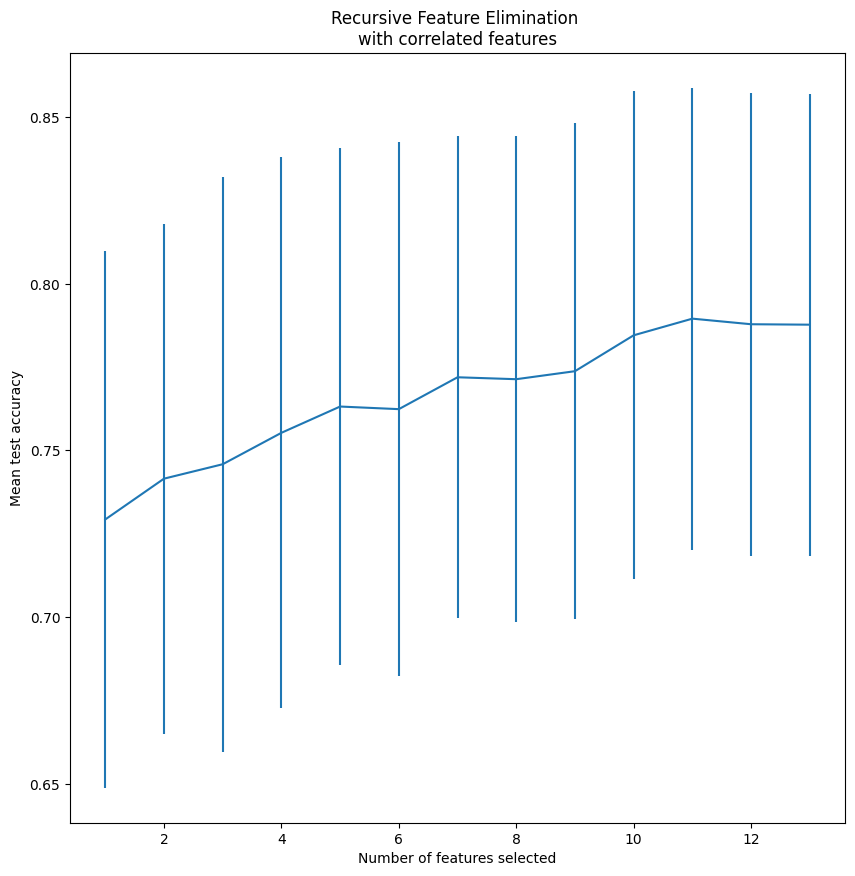

In [49]:
data = {
    key: value
    for key, value in rfecv.cv_results_.items()
    if key in ["n_features", "mean_test_score", "std_test_score"]
}
cv_results = pd.DataFrame(data)
plt.figure(figsize=(10,10))
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

# Model Building RFECV

In [50]:
X_train_rfecv = Xt_train[col_supcv]
X_train_rfecvc = sm.add_constant(X_train_rfecv)
lm_rfecv = sm.OLS(yt_train,X_train_rfecvc).fit()

#Summary of linear model
print(lm_rfecv.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     76.67
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           2.93e-56
Time:                        14:03:50   Log-Likelihood:                -1545.2
No. Observations:                 164   AIC:                             3114.
Df Residuals:                     152   BIC:                             3152.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.283e+04    242.575  

## VIF CHECK

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
Xtrf = Xt_train[col_supcv]

In [53]:
Xtrf.head(2)

,wheelbase,carlength,carwidth,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
152,-0.470465,-1.193384,-1.048825,-0.993586,-0.794159,-0.728899,-0.283038,-1.073335,-0.65941,0.831633,0.992459
162,-0.470465,-0.574497,-0.664129,-0.748277,-0.649793,-0.728899,-0.283038,-0.856953,-0.65941,0.378517,0.418338


In [54]:
vif = pd.DataFrame()
vif['Features'] = Xtrf.columns
vif['VIF'] = [variance_inflation_factor(Xtrf.values, i) for i in range(Xtrf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,citympg,28.57
10,highwaympg,28.25
3,curbweight,20.85
1,carlength,8.81
7,horsepower,8.33
4,enginesize,6.55
0,wheelbase,6.15
2,carwidth,5.61
6,compressionratio,2.32
8,peakrpm,1.90


# LR1 droping curbweight p val 0.407

In [55]:
Xtrf1 = Xtrf.drop("curbweight", axis=1)
Xtrf1c = sm.add_constant(Xtrf1)
lm_1= sm.OLS(yt_train,Xtrf1c).fit()

#Summary of linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     84.44
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           4.37e-57
Time:                        14:03:50   Log-Likelihood:                -1545.6
No. Observations:                 164   AIC:                             3113.
Df Residuals:                     153   BIC:                             3147.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.283e+04    242.329  

## VIF CHECK

In [56]:
vif = pd.DataFrame()
vif['Features'] = Xtrf1.columns
vif['VIF'] = [variance_inflation_factor(Xtrf1.values, i) for i in range(Xtrf1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,citympg,28.55
9,highwaympg,26.44
1,carlength,7.91
6,horsepower,7.21
3,enginesize,5.87
0,wheelbase,5.80
2,carwidth,5.42
7,peakrpm,1.82
5,compressionratio,1.81
4,stroke,1.12


# LR2 droping highwaympg p val 0.476

In [57]:
Xtrf2 = Xtrf1.drop("highwaympg", axis=1)
Xtrf2c = sm.add_constant(Xtrf2)
lm_2= sm.OLS(yt_train,Xtrf2c).fit()

#Summary of linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     94.06
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           5.62e-58
Time:                        14:03:50   Log-Likelihood:                -1545.9
No. Observations:                 164   AIC:                             3112.
Df Residuals:                     154   BIC:                             3143.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.283e+04    241.945  

In [58]:
vif = pd.DataFrame()
vif['Features'] = Xtrf2.columns
vif['VIF'] = [variance_inflation_factor(Xtrf2.values, i) for i in range(Xtrf2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carlength,7.58
6,horsepower,7.21
3,enginesize,5.74
2,carwidth,5.40
0,wheelbase,5.33
8,citympg,5.05
7,peakrpm,1.82
5,compressionratio,1.80
4,stroke,1.10


# LR 3 droping citympg p val 0.99

In [59]:
Xtrf3 = Xtrf2.drop("citympg", axis=1)
Xtrf3c = sm.add_constant(Xtrf3)
lm_3= sm.OLS(yt_train,Xtrf3c).fit()

#Summary of linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     104.3
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           2.07e-58
Time:                        14:03:50   Log-Likelihood:                -1547.3
No. Observations:                 164   AIC:                             3113.
Df Residuals:                     155   BIC:                             3141.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.283e+04    243.315  

In [60]:
vif = pd.DataFrame()
vif['Features'] = Xtrf3.columns
vif['VIF'] = [variance_inflation_factor(Xtrf3.values, i) for i in range(Xtrf3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carlength,6.48
3,enginesize,5.45
2,carwidth,5.31
0,wheelbase,5.29
6,horsepower,5.24
7,peakrpm,1.82
5,compressionratio,1.44
4,stroke,1.10


# LR 4 dropping carlength p val 0.250

In [61]:
Xtrf4 = Xtrf3.drop("carlength", axis=1)
Xtrf4c = sm.add_constant(Xtrf4)
lm_4= sm.OLS(yt_train,Xtrf4c).fit()

#Summary of linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     118.7
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           3.53e-59
Time:                        14:03:50   Log-Likelihood:                -1548.0
No. Observations:                 164   AIC:                             3112.
Df Residuals:                     156   BIC:                             3137.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.283e+04    243.574  

In [62]:
vif = pd.DataFrame()
vif['Features'] = Xtrf4.columns
vif['VIF'] = [variance_inflation_factor(Xtrf4.values, i) for i in range(Xtrf4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,5.45
5,horsepower,4.95
1,carwidth,4.79
0,wheelbase,3.21
6,peakrpm,1.82
4,compressionratio,1.44
3,stroke,1.09


# LR 5 droping wheelbase p val 0.126

In [63]:
Xtrf5 = Xtrf4.drop("wheelbase", axis=1)
Xtrf5c = sm.add_constant(Xtrf5)
lm_5= sm.OLS(yt_train,Xtrf5c).fit()

#Summary of linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     137.0
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           9.27e-60
Time:                        14:03:50   Log-Likelihood:                -1549.3
No. Observations:                 164   AIC:                             3113.
Df Residuals:                     157   BIC:                             3134.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.283e+04    244.633  

In [64]:
vif = pd.DataFrame()
vif['Features'] = Xtrf5.columns
vif['VIF'] = [variance_inflation_factor(Xtrf5.values, i) for i in range(Xtrf5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,5.42
4,horsepower,4.79
0,carwidth,2.50
5,peakrpm,1.78
3,compressionratio,1.44
2,stroke,1.09


# LR 5 can be used but enginesize has VIF> 5 according to Tibshibarani is a problem in his 2017 book

# TRIAL LM_5

In [65]:
df_lm5 = df[Xtrf5.columns]
df_lm5

,carwidth,enginesize,stroke,compressionratio,horsepower,peakrpm
0,64.1,130,2.68,9.0,111,5000
1,64.1,130,2.68,9.0,111,5000
2,65.5,152,3.47,9.0,154,5000
3,66.2,109,3.40,10.0,102,5500
4,66.4,136,3.40,8.0,115,5500
...,...,...,...,...,...,...
200,68.9,141,3.15,9.5,114,5400
201,68.8,141,3.15,8.7,160,5300
202,68.9,173,2.87,8.8,134,5500
203,68.9,145,3.40,23.0,106,4800


In [66]:
Xt = df_t[num_fts]
yt = df_t['price']

Xtrial_train, Xtrial_test, ytrial_train, ytrial_test = train_test_split(Xt, yt, test_size=0.2, random_state=33)

In [67]:
Xtrial_train.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
152,95.7,158.7,63.6,54.5,2015.0,92.0,3.05,3.03,9.0,62.0,4800.0,31.0,38.0
162,95.7,166.3,64.4,52.8,2140.0,98.0,3.19,3.03,9.0,70.0,4800.0,28.0,34.0


In [68]:
df_lm5 = Xtrial_train[Xtrf5.columns]
df_lm5.head(2)

,carwidth,enginesize,stroke,compressionratio,horsepower,peakrpm
152,63.6,92.0,3.03,9.0,62.0,4800.0
162,64.4,98.0,3.03,9.0,70.0,4800.0


In [69]:
df_clm5 = sm.add_constant(df_lm5)
lm_t5 = sm.OLS(ytrial_train, df_clm5).fit()

print(lm_t5.summary2())

                       Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.833     
Dependent Variable:      price               AIC:                   3112.5570 
Date:                    2025-08-01 14:03    BIC:                   3134.2561 
No. Observations:        164                 Log-Likelihood:        -1549.3   
Df Model:                6                   F-statistic:           137.0     
Df Residuals:            157                 Prob (F-statistic):    9.27e-60  
R-squared:               0.840               Scale:                 9.8146e+06
------------------------------------------------------------------------------
                    Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
------------------------------------------------------------------------------
const            -61526.9614 12163.4031 -5.0584 0.0000 -85551.9835 -37501.9393
carwidth            767.3093   185.9371  4.1267 0.0001    400.0482   1134.57

In [70]:
priceeytrialtrain = lm_t5.predict(df_clm5)
priceeytrialtrain.head(3)

152     5370.923886
162     6994.154193
179    21668.379164
dtype: float64

In [71]:
ytrial_train.head(3)

152     6488.0
162     9258.0
179    15998.0
Name: price, dtype: float64

# LR 6 droping enginesize

In [72]:
Xtrf6 = Xtrf5.drop("enginesize", axis=1)
Xtrf6c = sm.add_constant(Xtrf6)
lm_6= sm.OLS(yt_train,Xtrf6c).fit()

#Summary of linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     107.1
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           6.42e-49
Time:                        14:03:51   Log-Likelihood:                -1578.0
No. Observations:                 164   AIC:                             3168.
Df Residuals:                     158   BIC:                             3187.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.283e+04    290.569  

# does not make any sense to continue regressing this numeric-only scenario

In [73]:
# import pickle

# with open("/home/bri/carprice/.venv/model/lm_5_T2_2nd.pkl", "wb") as model_file:
#     pickle.dump(lm_5, model_file)

# LR 5 predict

In [74]:
y_train_price = lm_5.predict(Xtrf5c)

Text(0.5, 0, 'Errors')

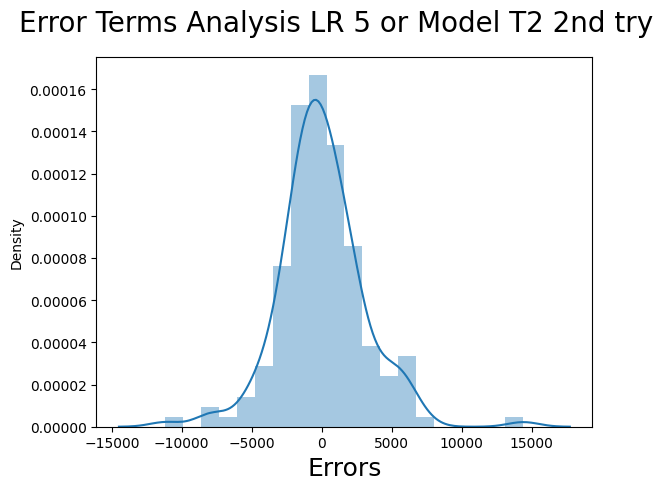

In [75]:
fig = plt.figure()
sns.distplot((yt_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis LR 5 or Model T2 2nd try', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

## predict test

In [76]:
Xttf = Xt_test[Xtrf5.columns]
Xttfa = sm.add_constant(Xttf)
Xttfa.head(3)

,const,carwidth,enginesize,stroke,compressionratio,horsepower,peakrpm
87,1.0,-0.441653,-0.604055,0.618334,-0.695536,0.045818,0.624775
47,1.0,1.386537,3.043115,2.779165,-0.541390,1.326634,-0.882035
188,1.0,-0.398125,-0.628698,0.435729,-0.053262,-0.295733,0.624775


In [77]:
y_predlr5 = lm_5.predict(Xttfa)

Text(0, 0.5, 'y_pred')

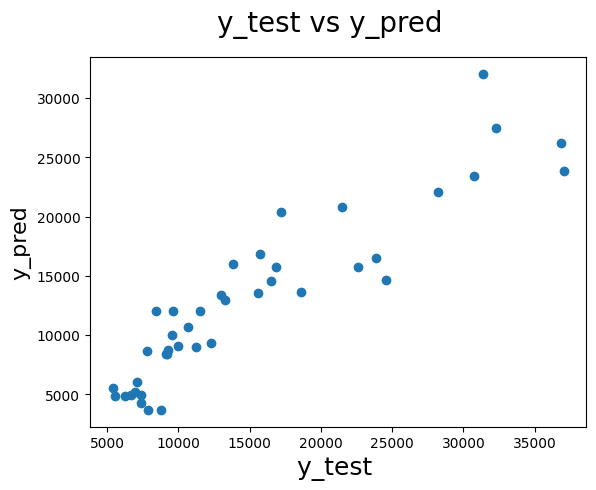

In [78]:
fig = plt.figure()
plt.scatter(yt_test,y_predlr5)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)

In [79]:
r2_score(yt_test, y_predlr5)

0.7669443376523319

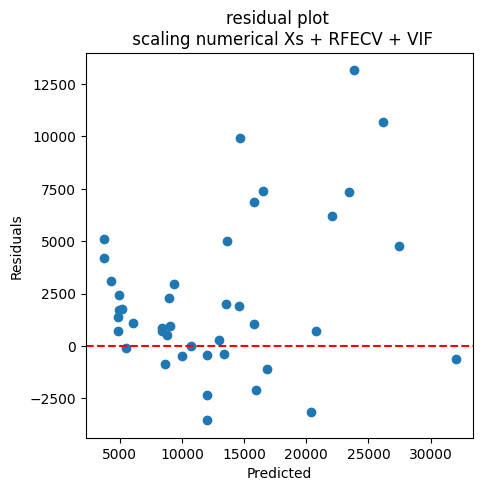

In [80]:
res4 = yt_test - y_predlr5

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.scatter(y_predlr5, res4)
plt.axhline(y=0, color='r', linestyle='--')
ax.set_title("residual plot \n scaling numerical Xs + RFECV + VIF")
plt.show()

In [81]:
mse = mean_squared_error(yt_test, y_predlr5)
rmse = np.sqrt(mse)
mae = mean_absolute_error(yt_test, y_predlr5)
r2 = r2_score(yt_test, y_predlr5)

df_sum = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Value': [mse, rmse, mae, r2]
})
df_sum['Value'] = df_sum['Value'].round(2)
df_sum

,Metric,Value
0,MSE,18468801.37
1,RMSE,4297.53
2,MAE,2982.79
3,R²,0.77


# T3 RFECV VIF cat

In [82]:
df_t2 = df_t.copy()
df_t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    float64
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    float64
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [83]:
catcol = df_t2.select_dtypes(include=['object', 'category']).columns.tolist()
catcol

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [84]:
dummies = pd.get_dummies(df_t2[catcol], drop_first=True)
df_t2.drop(catcol,axis=1,inplace=True)
df_t2 = pd.concat([df_t2, dummies], axis=1)

In [85]:
df_t2.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False


In [86]:
df_t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   carheight              205 non-null    float64
 4   curbweight             205 non-null    float64
 5   enginesize             205 non-null    float64
 6   boreratio              205 non-null    float64
 7   stroke                 205 non-null    float64
 8   compressionratio       205 non-null    float64
 9   horsepower             205 non-null    float64
 10  peakrpm                205 non-null    float64
 11  citympg                205 non-null    float64
 12  highwaympg             205 non-null    float64
 13  price                  205 non-null    float64
 14  symboling_-1           205 non-null    bool   
 15  symbol

In [87]:
x_col = df_t2.select_dtypes(include=['bool', 'Float64']).columns.tolist()
x_cols = [col for col in x_col if col != 'price']

Xt2 = df_t2[x_cols]
yt2 = df_t2['price']

Xt2_train, Xt2_test, yt2_train, yt2_test = train_test_split(Xt2, yt2, test_size=0.2, random_state=33)

In [88]:
Xt2_train.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
152,95.7,158.7,63.6,54.5,2015.0,92.0,3.05,3.03,9.0,62.0,4800.0,31.0,38.0,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
162,95.7,166.3,64.4,52.8,2140.0,98.0,3.19,3.03,9.0,70.0,4800.0,28.0,34.0,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
179,102.9,183.5,67.7,52.0,3016.0,171.0,3.27,3.35,9.3,161.0,5200.0,19.0,24.0,False,False,False,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False


In [89]:
nume = Xt2_train.select_dtypes(include=['Float64']).columns.tolist()
nume

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [90]:
Xt2_train[nume]= scaler.fit_transform(Xt2_train[nume])
Xt2_train

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
152,-0.470465,-1.193384,-1.048825,0.366713,-0.993586,-0.794159,-0.998357,-0.728899,-0.283038,-1.073335,-0.659410,0.831633,0.992459,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
162,-0.470465,-0.574497,-0.664129,-0.338875,-0.748277,-0.649793,-0.473219,-0.728899,-0.283038,-0.856953,-0.659410,0.378517,0.418338,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
179,0.749396,0.826143,0.922743,-0.670916,0.970850,1.106658,-0.173140,0.307477,-0.207651,1.604395,0.193791,-0.980830,-1.016964,False,False,False,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
103,0.325834,0.915719,0.345699,0.615744,1.057199,1.347268,0.427018,0.048383,-0.283038,1.360965,0.193791,-0.980830,-0.873434,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
50,-0.910970,-1.160811,-0.760303,0.200693,-1.238895,-0.818220,-1.073377,-0.340258,-0.283038,-0.911049,-0.232810,0.680595,-0.012253,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-0.538235,-0.354629,-0.038997,-1.667040,-0.267471,-1.323500,0.051919,-0.000197,-0.182522,-0.018472,1.900195,-1.282907,-1.160495,False,False,False,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False
146,-0.250212,0.011818,-0.183258,-0.255864,-0.453906,-0.409183,1.139706,-1.991983,-0.283038,-0.532380,-0.659410,0.378517,0.131278,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
66,1.088247,0.133966,0.153351,0.325208,0.350708,0.216402,0.427018,1.246693,2.983733,-0.802857,-1.939213,0.831633,1.135989,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
135,0.105581,1.078584,0.345699,1.030796,0.464532,-0.096391,0.839627,-0.599352,-0.207651,0.224958,0.300441,-0.678753,-0.442843,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False


In [91]:
Xt2_test[nume] = scaler.fit_transform(Xt2_test[nume])
Xt2_test.sample(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
156,-0.664302,-0.875765,-0.876937,-0.463280,-1.142092,-0.899771,-0.699655,-0.690337,-0.310171,-0.936141,-0.781581,0.978221,1.206006,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
202,1.467518,0.996092,1.081839,0.536429,0.596276,0.948456,0.705808,-1.177285,-0.361553,0.430063,0.624775,-1.018811,-1.019870,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
38,-0.537029,-0.775933,-0.528710,-0.343314,-0.753713,-0.604055,-0.843805,0.983545,-0.310171,-0.594590,1.227499,0.478963,0.570042,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [92]:
boole = Xt2_train.select_dtypes(include='bool').columns.to_list()
Xt2_train[boole] = Xt2_train[boole].astype(int)
Xt2_train.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
152,-0.470465,-1.193384,-1.048825,0.366713,-0.993586,-0.794159,-0.998357,-0.728899,-0.283038,-1.073335,-0.659410,0.831633,0.992459,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
162,-0.470465,-0.574497,-0.664129,-0.338875,-0.748277,-0.649793,-0.473219,-0.728899,-0.283038,-0.856953,-0.659410,0.378517,0.418338,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
179,0.749396,0.826143,0.922743,-0.670916,0.970850,1.106658,-0.173140,0.307477,-0.207651,1.604395,0.193791,-0.980830,-1.016964,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [93]:
boole = Xt2_test.select_dtypes(include='bool').columns.to_list()
Xt2_test[boole] = Xt2_test[boole].astype(int)
Xt2_test.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
87,-0.568847,-0.368284,-0.441653,-1.023116,-0.540852,-0.604055,-0.771730,0.618334,-0.695536,0.045818,0.624775,-0.186714,0.093068,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
47,2.087973,1.894584,1.386537,-0.543256,2.564310,3.043115,0.885996,2.779165,-0.541390,1.326634,-0.882035,-1.518069,-1.655835,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
188,-0.409756,-0.426520,-0.398125,0.616406,-0.733174,-0.628698,-0.699655,0.435729,-0.053262,-0.295733,0.624775,0.312544,0.411050,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [94]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regresion':Ridge(alpha=1.0),
    'Lasso Regression':Lasso(alpha=0.1),
    'ElasticNet Regression':ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = pd.DataFrame()
# Loop training dan evaluasi model
for name, model in models.items():
    model.fit(Xt2_train, yt2_train)
    yt2_pred = model.predict(Xt2_test)

    mse = mean_squared_error(yt2_test, yt2_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(yt2_test, yt2_pred)
    r2 = r2_score(yt2_test, yt2_pred)

    # Simpan hasil evaluasi di dictionary
    results[name] = {'RMSE': rmse, 'R^2': r2, 'MAE': mae}
    

# Tampilan Hasil Evaluasi
for model_name, metrics in results.items():
  print(f"{model_name}:")
  print(f" RMSE: {metrics['RMSE']:.2f}")
  print(f" MAE: {metrics['MAE']:.2f}")
  print(f" R^2: {metrics['R^2']:.3f}")
  print("")

Linear Regression:
 RMSE: 3659.23
 MAE: 2894.07
 R^2: 0.831

Ridge Regresion:
 RMSE: 3480.61
 MAE: 2636.06
 R^2: 0.847

Lasso Regression:
 RMSE: 3654.82
 MAE: 2892.98
 R^2: 0.831

ElasticNet Regression:
 RMSE: 3963.17
 MAE: 2881.76
 R^2: 0.802



In [95]:
Xt_train2 = sm.add_constant(Xt2_train)
lr_t2 = sm.OLS(yt2_train, Xt_train2).fit()
print(lr_t2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     43.59
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           1.16e-55
Time:                        14:03:54   Log-Likelihood:                -1468.9
No. Observations:                 164   AIC:                             3026.
Df Residuals:                     120   BIC:                             3162.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.391e+

In [96]:
Xt_test2 = sm.add_constant(Xt2_test)
yt_pred2 = lr_t2.predict(Xt_test2)

In [97]:
r2_score(yt2_test, yt_pred2)

0.8310335808854021

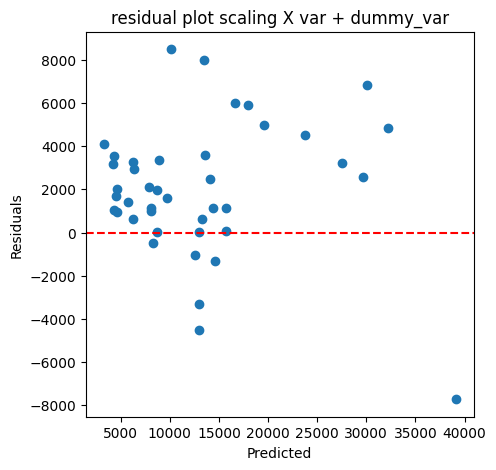

In [98]:
res2 = yt2_test - yt_pred2

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.scatter(yt_pred2, res2)
plt.axhline(y=0, color='r', linestyle='--')
ax.set_title("residual plot scaling X var + dummy_var")
plt.show()

In [99]:
lm = LinearRegression()
lm.fit(Xt2_train, yt2_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [100]:
rfecv = RFECV(estimator=lm)       
rfecv = rfecv.fit(Xt2_train, yt2_train)
list(zip(Xt2_train.columns,rfecv.support_,rfecv.ranking_))

[('wheelbase', np.False_, np.int64(22)),
 ('carlength', np.False_, np.int64(5)),
 ('carwidth', np.False_, np.int64(7)),
 ('carheight', np.False_, np.int64(29)),
 ('curbweight', np.True_, np.int64(1)),
 ('enginesize', np.True_, np.int64(1)),
 ('boreratio', np.False_, np.int64(10)),
 ('stroke', np.False_, np.int64(6)),
 ('compressionratio', np.False_, np.int64(14)),
 ('horsepower', np.True_, np.int64(1)),
 ('peakrpm', np.False_, np.int64(17)),
 ('citympg', np.False_, np.int64(20)),
 ('highwaympg', np.False_, np.int64(19)),
 ('symboling_-1', np.False_, np.int64(3)),
 ('symboling_0', np.True_, np.int64(1)),
 ('symboling_1', np.True_, np.int64(1)),
 ('symboling_2', np.False_, np.int64(2)),
 ('symboling_3', np.True_, np.int64(1)),
 ('fueltype_gas', np.False_, np.int64(15)),
 ('aspiration_turbo', np.False_, np.int64(24)),
 ('doornumber_two', np.False_, np.int64(21)),
 ('carbody_hardtop', np.False_, np.int64(13)),
 ('carbody_hatchback', np.False_, np.int64(4)),
 ('carbody_sedan', np.False_, np

In [101]:
col_supcv = Xt2_train.columns[rfecv.support_]
print(col_supcv)
print(f"Optimal number of features: {rfecv.n_features_}")

Index(['curbweight', 'enginesize', 'horsepower', 'symboling_0', 'symboling_1',
       'symboling_3', 'carbody_wagon', 'enginelocation_rear', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')
Optimal number of features: 17


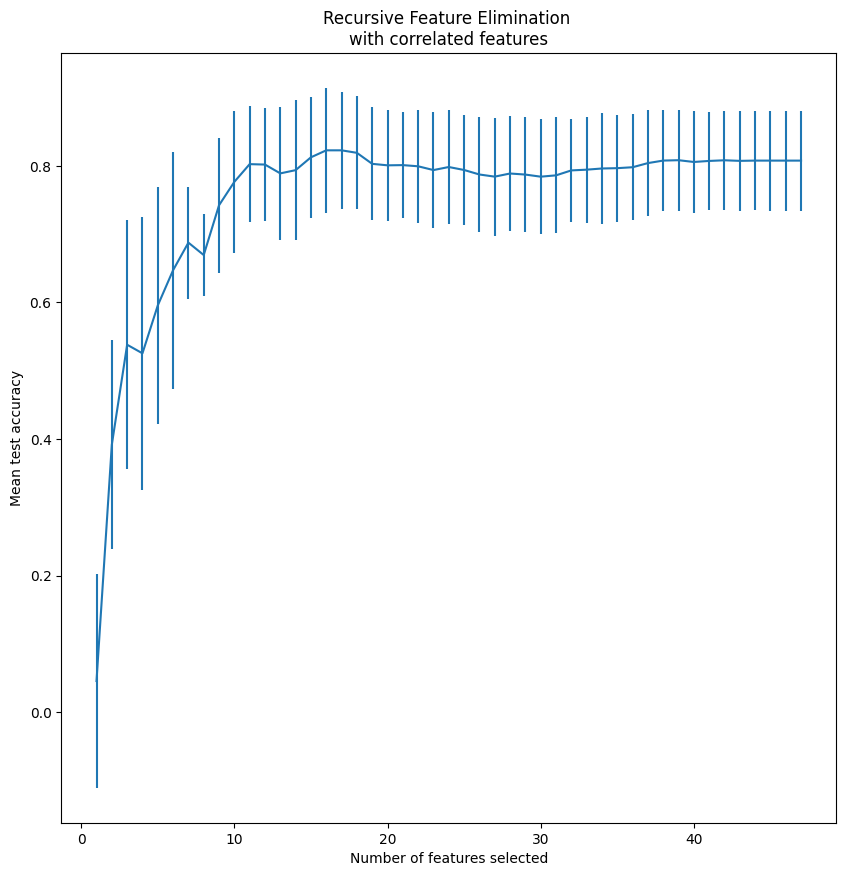

In [102]:
data = {
    key: value
    for key, value in rfecv.cv_results_.items()
    if key in ["n_features", "mean_test_score", "std_test_score"]
}
cv_results = pd.DataFrame(data)
plt.figure(figsize=(10,10))
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

# Model Building RFECV

In [103]:
X_train_rfecv = Xt2_train[col_supcv]
X_train_rfecvc = sm.add_constant(X_train_rfecv)
lm_rfecv = sm.OLS(yt2_train,X_train_rfecvc).fit()

#Summary of linear model
print(lm_rfecv.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     86.20
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           3.78e-67
Time:                        14:03:54   Log-Likelihood:                -1502.4
No. Observations:                 164   AIC:                             3041.
Df Residuals:                     146   BIC:                             3097.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.244e+

# VIF CHECK

In [104]:
Xtrf = Xt2_train[col_supcv]
Xtrf

,curbweight,enginesize,horsepower,symboling_0,symboling_1,symboling_3,carbody_wagon,enginelocation_rear,enginetype_ohc,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_spdi,fuelsystem_spfi
152,-0.993586,-0.794159,-1.073335,0,1,0,0,0,1,0,0,1,0,0,0,0,0
162,-0.748277,-0.649793,-0.856953,1,0,0,0,0,1,0,0,1,0,0,0,0,0
179,0.970850,1.106658,1.604395,0,0,1,0,0,0,0,0,0,1,0,0,0,0
103,1.057199,1.347268,1.360965,1,0,0,0,0,0,1,0,0,1,0,0,0,0
50,-1.238895,-0.818220,-0.911049,0,1,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-0.267471,-1.323500,-0.018472,0,0,1,0,0,0,0,0,0,0,0,1,0,0
146,-0.453906,-0.409183,-0.532380,1,0,0,1,0,0,0,0,1,0,0,0,0,0
66,0.350708,0.216402,-0.802857,1,0,0,0,0,1,0,0,1,0,0,0,0,0
135,0.464532,-0.096391,0.224958,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [105]:
vif = pd.DataFrame()
vif['Features'] = Xtrf.columns
vif['VIF'] = [variance_inflation_factor(Xtrf.values, i) for i in range(Xtrf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cylindernumber_four,10.64
1,enginesize,10.16
0,curbweight,8.62
8,enginetype_ohc,7.45
2,horsepower,5.92
3,symboling_0,2.58
9,enginetype_ohcv,2.47
5,symboling_3,2.44
4,symboling_1,2.31
12,cylindernumber_six,2.31


# LR 1 droping symboling_3 p val 0.483

In [106]:
Xtrf1 = Xtrf.drop("symboling_3", axis=1)
Xtrf1c = sm.add_constant(Xtrf1)
lm_1= sm.OLS(yt2_train,Xtrf1c).fit()

#Summary of linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     91.87
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           4.94e-68
Time:                        14:03:54   Log-Likelihood:                -1502.7
No. Observations:                 164   AIC:                             3039.
Df Residuals:                     147   BIC:                             3092.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.255e+

In [107]:
vif = pd.DataFrame()
vif['Features'] = Xtrf1.columns
vif['VIF'] = [variance_inflation_factor(Xtrf1.values, i) for i in range(Xtrf1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,10.01
10,cylindernumber_four,8.64
0,curbweight,8.41
7,enginetype_ohc,7.22
2,horsepower,5.64
8,enginetype_ohcv,2.47
3,symboling_0,2.28
11,cylindernumber_six,2.21
4,symboling_1,2.08
9,cylindernumber_five,1.92


# LR 2 droping fuelsystem_spfi p val 0.432

In [108]:
Xtrf2 = Xtrf1.drop("fuelsystem_spfi", axis=1)
Xtrf2c = sm.add_constant(Xtrf2)
lm_2= sm.OLS(yt2_train,Xtrf2c).fit()

#Summary of linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     98.21
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           6.65e-69
Time:                        14:03:55   Log-Likelihood:                -1503.1
No. Observations:                 164   AIC:                             3038.
Df Residuals:                     148   BIC:                             3088.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.253e+

In [109]:
vif = pd.DataFrame()
vif['Features'] = Xtrf2.columns
vif['VIF'] = [variance_inflation_factor(Xtrf2.values, i) for i in range(Xtrf2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,9.95
10,cylindernumber_four,8.63
0,curbweight,8.25
7,enginetype_ohc,7.18
2,horsepower,5.60
8,enginetype_ohcv,2.46
3,symboling_0,2.26
11,cylindernumber_six,2.21
4,symboling_1,2.07
9,cylindernumber_five,1.92


# LR 3 droping symboling_1 0.066

In [110]:
Xtrf3 = Xtrf2.drop("symboling_1", axis=1)
Xtrf3c = sm.add_constant(Xtrf3)
lm_3= sm.OLS(yt2_train,Xtrf3c).fit()

#Summary of linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     103.3
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           3.43e-69
Time:                        14:03:55   Log-Likelihood:                -1504.9
No. Observations:                 164   AIC:                             3040.
Df Residuals:                     149   BIC:                             3086.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   2.26e+

In [111]:
vif = pd.DataFrame()
vif['Features'] = Xtrf3.columns
vif['VIF'] = [variance_inflation_factor(Xtrf3.values, i) for i in range(Xtrf3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,9.87
9,cylindernumber_four,7.90
0,curbweight,7.89
6,enginetype_ohc,7.18
2,horsepower,5.56
7,enginetype_ohcv,2.33
10,cylindernumber_six,2.13
3,symboling_0,1.93
8,cylindernumber_five,1.80
5,enginelocation_rear,1.63


# LR 4 dropping symboling_0 p val 0.112

In [112]:
Xtrf4 = Xtrf3.drop("symboling_0", axis=1)
Xtrf4c = sm.add_constant(Xtrf4)
lm_4= sm.OLS(yt2_train,Xtrf4c).fit()

#Summary of linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     109.9
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           1.13e-69
Time:                        14:03:55   Log-Likelihood:                -1506.3
No. Observations:                 164   AIC:                             3041.
Df Residuals:                     150   BIC:                             3084.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   2.26e+

In [113]:
vif = pd.DataFrame()
vif['Features'] = Xtrf4.columns
vif['VIF'] = [variance_inflation_factor(Xtrf4.values, i) for i in range(Xtrf4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,9.78
0,curbweight,7.74
5,enginetype_ohc,6.93
8,cylindernumber_four,6.66
2,horsepower,5.21
6,enginetype_ohcv,2.33
9,cylindernumber_six,1.94
7,cylindernumber_five,1.77
4,enginelocation_rear,1.63
10,cylindernumber_twelve,1.47


# LR 5 droping carbody_wagon p val 0.065

In [114]:
Xtrf5 = Xtrf4.drop("carbody_wagon", axis=1)
Xtrf5c = sm.add_constant(Xtrf5)
lm_5= sm.OLS(yt2_train,Xtrf5c).fit()

#Summary of linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     116.9
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           5.59e-70
Time:                        14:03:55   Log-Likelihood:                -1508.2
No. Observations:                 164   AIC:                             3042.
Df Residuals:                     151   BIC:                             3083.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.247e+

In [115]:
vif = pd.DataFrame()
vif['Features'] = Xtrf5.columns
vif['VIF'] = [variance_inflation_factor(Xtrf5.values, i) for i in range(Xtrf5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,9.32
0,curbweight,7.06
4,enginetype_ohc,6.83
7,cylindernumber_four,6.30
2,horsepower,5.15
5,enginetype_ohcv,2.30
8,cylindernumber_six,1.93
6,cylindernumber_five,1.76
3,enginelocation_rear,1.62
9,cylindernumber_twelve,1.46


# LR 6 droping enginesize VIF VIF 9.32

In [116]:
Xtrf6 = Xtrf5.drop("enginesize", axis=1)
Xtrf6c = sm.add_constant(Xtrf6)
lm_6= sm.OLS(yt2_train,Xtrf6c).fit()

#Summary of linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     109.7
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           1.90e-66
Time:                        14:03:55   Log-Likelihood:                -1519.7
No. Observations:                 164   AIC:                             3063.
Df Residuals:                     152   BIC:                             3101.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.602e+

In [117]:
vif = pd.DataFrame()
vif['Features'] = Xtrf6.columns
vif['VIF'] = [variance_inflation_factor(Xtrf6.values, i) for i in range(Xtrf6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginetype_ohc,6.19
6,cylindernumber_four,5.45
1,horsepower,4.98
0,curbweight,3.51
7,cylindernumber_six,1.91
4,enginetype_ohcv,1.72
5,cylindernumber_five,1.68
2,enginelocation_rear,1.47
8,cylindernumber_twelve,1.32
10,fuelsystem_spdi,1.26


# LR 7 droping enginetype_ohc VIF 6.19

In [118]:
Xtrf7 = Xtrf6.drop("enginetype_ohc", axis=1)
Xtrf7c = sm.add_constant(Xtrf7)
lm_7= sm.OLS(yt2_train,Xtrf7c).fit()

#Summary of linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     105.8
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           1.75e-63
Time:                        14:03:55   Log-Likelihood:                -1529.7
No. Observations:                 164   AIC:                             3081.
Df Residuals:                     153   BIC:                             3115.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   2.73e+

In [119]:
print(lm_7.summary2())

                         Results: Ordinary least squares
Model:                   OLS                   Adj. R-squared:          0.865     
Dependent Variable:      price                 AIC:                     3081.3781 
Date:                    2025-08-01 14:03      BIC:                     3115.4766 
No. Observations:        164                   Log-Likelihood:          -1529.7   
Df Model:                10                    F-statistic:             105.8     
Df Residuals:            153                   Prob (F-statistic):      1.75e-63  
R-squared:               0.874                 Scale:                   7.9310e+06
----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------------
const                  27304.7706 1691.6822 16.1406 0.0000  23962.6996  30646.8415
curbweight              4049.2

In [120]:
X_train.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
152,95.7,158.7,63.6,54.5,2015,92,3.05,3.03,9.0,62,4800,31,38
162,95.7,166.3,64.4,52.8,2140,98,3.19,3.03,9.0,70,4800,28,34


In [121]:
Xtrf.head(2)

,curbweight,enginesize,horsepower,symboling_0,symboling_1,symboling_3,carbody_wagon,enginelocation_rear,enginetype_ohc,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_spdi,fuelsystem_spfi
152,-0.993586,-0.794159,-1.073335,0,1,0,0,0,1,0,0,1,0,0,0,0,0
162,-0.748277,-0.649793,-0.856953,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [122]:
ad = lm_7.params
ad

const                    27304.770583
curbweight                4049.258352
horsepower                2043.568085
enginelocation_rear      10873.294698
enginetype_ohcv          -4740.600030
cylindernumber_five     -11608.963694
cylindernumber_four     -15117.770350
cylindernumber_six      -12586.476619
cylindernumber_twelve    -6778.847044
cylindernumber_two      -13842.390357
fuelsystem_spdi          -2753.163526
dtype: float64

In [123]:
df_param = pd.DataFrame({'param':ad.index, 'coef':ad.values})
df_param['coef'] = df_param['coef'].round(2)
df_param = df_param.sort_values(by='coef', ascending=False)
df_param

,param,coef
0,const,27304.77
3,enginelocation_rear,10873.29
1,curbweight,4049.26
2,horsepower,2043.57
10,fuelsystem_spdi,-2753.16
4,enginetype_ohcv,-4740.60
8,cylindernumber_twelve,-6778.85
5,cylindernumber_five,-11608.96
7,cylindernumber_six,-12586.48
9,cylindernumber_two,-13842.39


y-hat = 27305 + 4050 curbweight + 2044 horsepower blm selesai

In [124]:
vif = pd.DataFrame()
vif['Features'] = Xtrf7.columns
vif['VIF'] = [variance_inflation_factor(Xtrf7.values, i) for i in range(Xtrf7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,4.97
0,curbweight,3.29
6,cylindernumber_six,1.74
3,enginetype_ohcv,1.71
2,enginelocation_rear,1.45
5,cylindernumber_four,1.35
7,cylindernumber_twelve,1.32
9,fuelsystem_spdi,1.25
4,cylindernumber_five,1.11
8,cylindernumber_two,1.02


# LR7 will be use for prediction

In [125]:
y_train_price = lm_7.predict(Xtrf7c)

Text(0.5, 0, 'Errors')

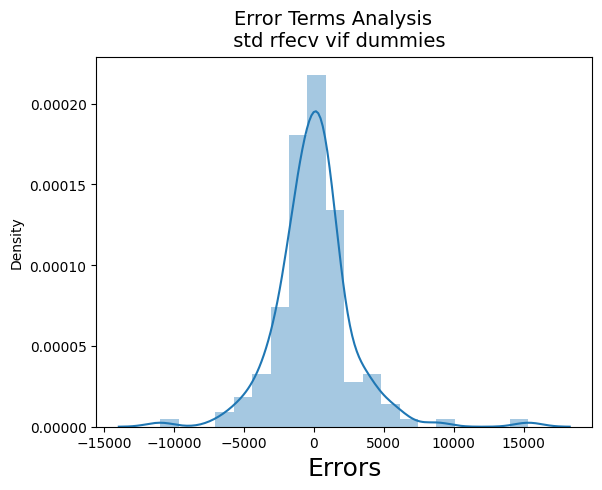

In [126]:
fig = plt.figure()
sns.distplot((yt2_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis \n std rfecv vif dummies', fontsize = 14)                   
plt.xlabel('Errors', fontsize = 18)

In [127]:
Xt2_test.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
87,-0.568847,-0.368284,-0.441653,-1.023116,-0.540852,-0.604055,-0.771730,0.618334,-0.695536,0.045818,0.624775,-0.186714,0.093068,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
47,2.087973,1.894584,1.386537,-0.543256,2.564310,3.043115,0.885996,2.779165,-0.541390,1.326634,-0.882035,-1.518069,-1.655835,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
188,-0.409756,-0.426520,-0.398125,0.616406,-0.733174,-0.628698,-0.699655,0.435729,-0.053262,-0.295733,0.624775,0.312544,0.411050,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [128]:
yt2_test.head(3)

87      9279.0
47     32250.0
188     9995.0
Name: price, dtype: float64

In [129]:
Xttf = Xt2_test[Xtrf7.columns]
Xttfa = sm.add_constant(Xttf)
Xttfa.head(3)

,const,curbweight,horsepower,enginelocation_rear,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_spdi
87,1.0,-0.540852,0.045818,0,0,0,1,0,0,0,1
47,1.0,2.564310,1.326634,0,0,0,0,1,0,0,0
188,1.0,-0.733174,-0.295733,0,0,0,1,0,0,0,0


In [130]:
y_predlr7 = lm_7.predict(Xttfa)

Text(0, 0.5, 'y_pred')

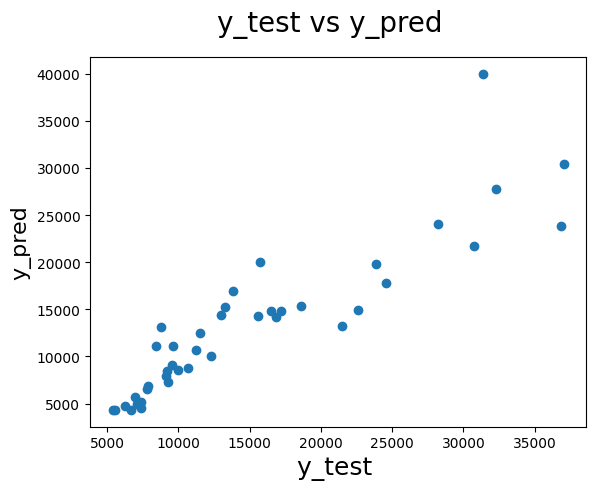

In [131]:
fig = plt.figure()
plt.scatter(yt2_test,y_predlr7)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)  

In [132]:
r2_score(yt2_test, y_predlr7)

0.774504744956313

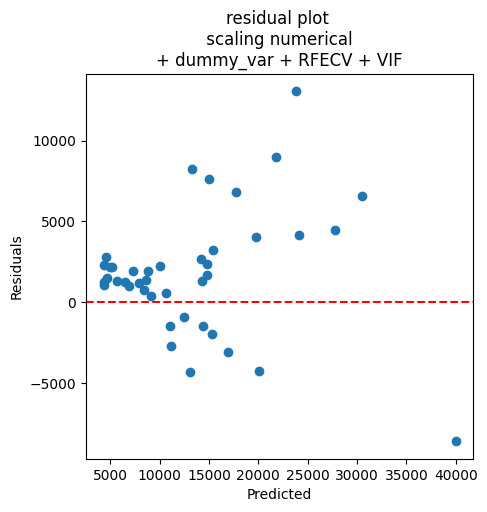

In [133]:
res4 = yt2_test - y_predlr7

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.scatter(y_predlr7, res4)
plt.axhline(y=0, color='r', linestyle='--')
ax.set_title("residual plot \n scaling numerical \n+ dummy_var + RFECV + VIF")
plt.show()

# pickle model

In [134]:
# import pickle

# with open("/home/bri/carprice/.venv/model/lm_7_T3_2nd.pkl", "wb") as model_file:
#     pickle.dump(lm_7, model_file)

In [135]:
mse = mean_squared_error(yt2_test, y_predlr7)
rmse = np.sqrt(mse)
mae = mean_absolute_error(yt2_test, y_predlr7)
r2 = r2_score(yt2_test, y_predlr7)

df_sum = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Value': [mse, rmse, mae, r2]
})
df_sum['Value'] = df_sum['Value'].round(2)
df_sum
# print(f" RMSE: {metrics['RMSE']:.2f}")
# print(f" MAE: {metrics['MAE']:.2f}")
# print(f" R^2: {metrics['R^2']:.3f}")

,Metric,Value
0,MSE,17869666.99
1,RMSE,4227.25
2,MAE,3199.25
3,R²,0.77


In [136]:
results

,Linear Regression,Ridge Regresion,Lasso Regression,ElasticNet Regression
RMSE,3659.230152,3480.608600,3654.818984,3963.170332
R^2,0.831034,0.847127,0.831441,0.801799
MAE,2894.069908,2636.056473,2892.977612,2881.763196


In [137]:
r2_score(yt2_test, y_predlr7)

0.774504744956313

# TRIAL

In [138]:
df_t.head(3)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0


In [139]:
df_a = df_t.copy()
catcol = df_a.select_dtypes(include=['object', 'category']).columns.tolist()
dummies = pd.get_dummies(df_a[catcol], drop_first=True)
df_a.drop(catcol,axis=1,inplace=True)
df_a = pd.concat([df_a, dummies], axis=1)
boole = df_a.select_dtypes(include='bool').columns.to_list()
df_a[boole] = df_a[boole].astype(int)
df_a = df_a[Xtrf7.columns]
df_a.head(3)

,curbweight,horsepower,enginelocation_rear,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_spdi
0,2548.0,111.0,0,0,0,1,0,0,0,0
1,2548.0,111.0,0,0,0,1,0,0,0,0
2,2823.0,154.0,0,1,0,0,1,0,0,0


In [140]:
df_a

,curbweight,horsepower,enginelocation_rear,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_spdi
0,2548.0,111.0,0,0,0,1,0,0,0,0
1,2548.0,111.0,0,0,0,1,0,0,0,0
2,2823.0,154.0,0,1,0,0,1,0,0,0
3,2337.0,102.0,0,0,0,1,0,0,0,0
4,2824.0,115.0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
200,2952.0,114.0,0,0,0,1,0,0,0,0
201,3049.0,160.0,0,0,0,1,0,0,0,0
202,3012.0,134.0,0,1,0,0,1,0,0,0
203,3217.0,106.0,0,0,0,0,1,0,0,0


In [141]:
X = df_a
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [142]:
X_train

,curbweight,horsepower,enginelocation_rear,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_spdi
152,2015.0,62.0,0,0,0,1,0,0,0,0
162,2140.0,70.0,0,0,0,1,0,0,0,0
179,3016.0,161.0,0,0,0,0,1,0,0,0
103,3060.0,152.0,0,1,0,0,1,0,0,0
50,1890.0,68.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
57,2385.0,101.0,0,0,0,0,0,0,1,0
146,2290.0,82.0,0,0,0,1,0,0,0,0
66,2700.0,72.0,0,0,0,1,0,0,0,0
135,2758.0,110.0,0,0,0,1,0,0,0,0


In [143]:
Xtrains = sm.add_constant(X_train)
lm_trial= sm.OLS(y_train,Xtrains).fit()

#Summary of linear model
print(lm_trial.summary2())

                         Results: Ordinary least squares
Model:                   OLS                   Adj. R-squared:          0.865     
Dependent Variable:      price                 AIC:                     3081.3781 
Date:                    2025-08-01 14:03      BIC:                     3115.4766 
No. Observations:        164                   Log-Likelihood:          -1529.7   
Df Model:                10                    F-statistic:             105.8     
Df Residuals:            153                   Prob (F-statistic):      1.75e-63  
R-squared:               0.874                 Scale:                   7.9310e+06
----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------------
const                   1648.7395 2364.5874  0.6973 0.4867  -3022.7165   6320.1955
curbweight                 7.9

In [144]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,61.13
1,horsepower,42.48
2,enginelocation_rear,1.45
3,enginetype_ohcv,2.40
4,cylindernumber_five,2.52
5,cylindernumber_four,15.45
6,cylindernumber_six,3.28
7,cylindernumber_twelve,1.37
8,cylindernumber_two,1.46
9,fuelsystem_spdi,1.24


In [145]:
y_trial_train_p = lm_trial.predict(Xtrains)

In [146]:
y_trial_train_p.head(3)

152     5970.280032
162     7405.792275
179    21928.207962
dtype: float64

In [147]:
y_train.head(3)

152     6488.0
162     9258.0
179    15998.0
Name: price, dtype: float64

In [148]:
import pickle

with open("/home/bri/carprice/.venv/model/lm_use_2nd.pkl", "wb") as model_file:
    pickle.dump(lm_trial, model_file)

In [149]:
df_a[['curbweight', 'horsepower']].describe()

,curbweight,horsepower
count,205.000000,205.000000
mean,2555.565854,104.117073
std,520.680204,39.544167
min,1488.000000,48.000000
25%,2145.000000,70.000000
50%,2414.000000,95.000000
75%,2935.000000,116.000000
max,4066.000000,288.000000
